In [1]:
from PIL import Image
import os, glob, numpy as np
from sklearn.model_selection import train_test_split

caltech_dir = "C:/Users/ICT01_20/Desktop/food-5"
categories  = os.listdir(caltech_dir)
nb_classes = len(categories )
image_w = 128
image_h = 128

X = []
y = []

In [8]:
for idx, cat in enumerate(categories):
    
    #one-hot 돌리기.
    label = [0 for i in range(nb_classes)]
    label[idx] = 1

    image_dir = caltech_dir + "/" + cat
    files = glob.glob(image_dir+"/*.JPG")
    print(cat, " 파일 길이 : ", len(files))
    for i, f in enumerate(files):
        img = Image.open(f)
        img = img.convert("RGB")
        img = img.resize((image_w, image_h))
        data = np.asarray(img)

        X.append(data)
        y.append(label)

        if i % 700 == 0:
            print(cat, " : ", f)

X = np.array(X)
y = np.array(y)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)
xy = (X_train, X_test, X_val, y_train, y_test, y_val)
np.save("C:/Users/ICT01_20/Desktop/food-8", xy)

print("ok", len(y))

갈치구이  파일 길이 :  700
갈치구이  :  C:/Users/ICT01_20/Desktop/food-5/갈치구이\Img_001_0000.jpg
계란찜  파일 길이 :  784
계란찜  :  C:/Users/ICT01_20/Desktop/food-5/계란찜\Img_125_0000.jpg
계란찜  :  C:/Users/ICT01_20/Desktop/food-5/계란찜\Img_125_0871.jpg
고사리나물  파일 길이 :  896
고사리나물  :  C:/Users/ICT01_20/Desktop/food-5/고사리나물\Img_041_0000.JPG
고사리나물  :  C:/Users/ICT01_20/Desktop/food-5/고사리나물\Img_041_0782.jpg
메추리알장조림  파일 길이 :  719
메추리알장조림  :  C:/Users/ICT01_20/Desktop/food-5/메추리알장조림\Img_112_0001.jpg


C:\Users\ICT01_20\Anaconda3\envs\a\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 20 bytes but only got 6. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)


메추리알장조림  :  C:/Users/ICT01_20/Desktop/food-5/메추리알장조림\Img_112_0973.jpg
삼계탕  파일 길이 :  864
삼계탕  :  C:/Users/ICT01_20/Desktop/food-5/삼계탕\Img_138_0000.jpg
삼계탕  :  C:/Users/ICT01_20/Desktop/food-5/삼계탕\Img_138_0785.jpg
애호박볶음  파일 길이 :  725
애호박볶음  :  C:/Users/ICT01_20/Desktop/food-5/애호박볶음\Img_045_0000.jpg
애호박볶음  :  C:/Users/ICT01_20/Desktop/food-5/애호박볶음\Img_045_0965.jpg
오징어채볶음  파일 길이 :  704
오징어채볶음  :  C:/Users/ICT01_20/Desktop/food-5/오징어채볶음\Img_087_0003.jpg
오징어채볶음  :  C:/Users/ICT01_20/Desktop/food-5/오징어채볶음\Img_087_1070.jpg
콩자반  파일 길이 :  675
콩자반  :  C:/Users/ICT01_20/Desktop/food-5/콩자반\Img_025_0001.jpg
ok 6067


In [2]:
import os, glob, numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import keras.backend.tensorflow_backend as K
#np_load_old = np.load
#np.load = lambda *a, **k : np_load_old(*a, allow_pickle=True, **k)
#np.load = np_load_old

import tensorflow as tf
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.Session(config=config)

X_train, X_test, X_val, y_train, y_test, y_val= np.load('C:/Users/ICT01_20/Desktop/food-8.npy',allow_pickle=True)
# C:/Users/ICT01_20/Desktop/food-5-2.npy
# C:/Users/ICT01_20/Documents/study/test/food128-1.npy
print(X_train.shape)
print(X_train.shape[0])

Using TensorFlow backend.


(3639, 128, 128, 3)
3639


In [3]:
#일반화
X_train = X_train.astype(float) / 255
X_test = X_test.astype(float) / 255
X_val = X_test.astype(float) / 255

In [5]:
import keras
from keras.layers import BatchNormalization
with K.tf_ops.device('/device:GPU:0'):
    model = Sequential()
    model.add(Conv2D(32, (3,3), padding="same", input_shape=X_train.shape[1:], activation='relu'
                    ,kernel_regularizer=keras.regularizers.l2(0.001))) 
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))
    
    model.add(Conv2D(64, (3,3), padding="same", activation='relu' , kernel_regularizer=keras.regularizers.l2(0.001)))
    
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))
    
    model.add(Flatten())
    
    model.add(Dense(256, activation='relu' , kernel_regularizer=keras.regularizers.l2(0.001)))
    model.add(Dropout(0.5))
    model.add(Dense(nb_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model_dir = './test'
    
    if not os.path.exists(model_dir):
        os.mkdir(model_dir)
    
    model_path = model_dir + '/food-8.model'
    checkpoint = ModelCheckpoint(filepath=model_path , monitor='val_loss', verbose=1, save_best_only=True)
    early_stopping = EarlyStopping(monitor='val_loss', patience=6)






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.




In [21]:
keras.layers.LeakyReLU(alpha=0.3)

In [20]:
import keras
from keras.layers import BatchNormalization
with K.tf_ops.device('/device:GPU:0'):
    model = Sequential()
    model.add(Conv2D(32, (2,2), padding="same", input_shape=X_train.shape[1:], activation='relu'
                    ,kernel_regularizer=keras.regularizers.l2(0.001))) 
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))
    
    model.add(Conv2D(64, (2,2), padding="same", activation='relu' , kernel_regularizer=keras.regularizers.l2(0.001)))
    
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))
    
    model.add(Conv2D(128, (2,2), padding="same", activation='relu' , kernel_regularizer=keras.regularizers.l2(0.001)))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))
    
    model.add(Flatten()) # 65536 
    
    model.add(Dense(256, activation='relu' , kernel_regularizer=keras.regularizers.l2(0.001)))
    model.add(Dropout(0.5))
    model.add(Dense(nb_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model_dir = './test'
    
    if not os.path.exists(model_dir):
        os.mkdir(model_dir)
    
    model_path = model_dir + '/food-8.model'
    checkpoint = ModelCheckpoint(filepath=model_path , monitor='val_loss', verbose=1, save_best_only=True)
    early_stopping = EarlyStopping(monitor='val_loss', patience=6)

ValueError: Unknown activation function:leaky_relu

In [8]:
import keras
from keras.layers import LeakyReLU
from keras.layers import BatchNormalization
with K.tf_ops.device('/device:GPU:0'):
    model = Sequential()
    model.add(Conv2D(32, (2,2), padding="same", input_shape=X_train.shape[1:],kernel_regularizer=keras.regularizers.l2(0.001))) 
    model.add(LeakyReLU(alpha=0.01))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))
    
    model.add(Conv2D(64, (2,2), padding="same", kernel_regularizer=keras.regularizers.l2(0.001)))
    model.add(LeakyReLU(alpha=0.01))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))
    
    model.add(Conv2D(128, (2,2), padding="same", kernel_regularizer=keras.regularizers.l2(0.001)))
    model.add(LeakyReLU(alpha=0.01))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))
    
    model.add(Flatten()) # 65536 
    
    model.add(Dense(256, kernel_regularizer=keras.regularizers.l2(0.001)))
    model.add(LeakyReLU(alpha=0.01))
    model.add(Dropout(0.5))
    model.add(Dense(8, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model_dir = './test'
    
    if not os.path.exists(model_dir):
        os.mkdir(model_dir)
    
    model_path = model_dir + '/food-8.model'
    checkpoint = ModelCheckpoint(filepath=model_path , monitor='val_loss', verbose=1, save_best_only=True)
    early_stopping = EarlyStopping(monitor='val_loss', patience=6)

In [5]:
import keras
from keras.layers import ELU
from keras.layers import BatchNormalization
with K.tf_ops.device('/device:GPU:0'):
    model = Sequential()
    model.add(Conv2D(32, (2,2), padding="same", input_shape=X_train.shape[1:],kernel_regularizer=keras.regularizers.l2(0.001))) 
    keras.layers.ELU(alpha=0.01)
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))
    
    model.add(Conv2D(64, (2,2), padding="same", kernel_regularizer=keras.regularizers.l2(0.001)))
    keras.layers.ELU(alpha=0.01)
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))
    
    model.add(Conv2D(128, (2,2), padding="same", kernel_regularizer=keras.regularizers.l2(0.001)))
    keras.layers.ELU(alpha=0.01)
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))
    
    model.add(Flatten()) # 65536 
    
    model.add(Dense(256, kernel_regularizer=keras.regularizers.l2(0.001)))
    keras.layers.ELU(alpha=0.01)
    model.add(Dropout(0.5))
    model.add(Dense(8, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model_dir = './test'
    
    if not os.path.exists(model_dir):
        os.mkdir(model_dir)
    
    model_path = model_dir + '/food-8.model'
    checkpoint = ModelCheckpoint(filepath=model_path , monitor='val_loss', verbose=1, save_best_only=True)
    early_stopping = EarlyStopping(monitor='val_loss', patience=6)






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.




In [14]:
import keras
from keras.layers import LeakyReLU
from keras.layers import BatchNormalization
with K.tf_ops.device('/device:GPU:0'):
    model = Sequential()
    model.add(Conv2D(32, (2,2), padding="same", input_shape=X_train.shape[1:],kernel_regularizer=keras.regularizers.l2(0.001))) 
    model.add(LeakyReLU(alpha=0.01))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))
    
    model.add(Conv2D(64, (2,2), padding="same", kernel_regularizer=keras.regularizers.l2(0.001)))
    model.add(LeakyReLU(alpha=0.01))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))
    
    model.add(Conv2D(128, (2,2), padding="same", kernel_regularizer=keras.regularizers.l2(0.001)))
    model.add(LeakyReLU(alpha=0.01))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))
    
    model.add(Conv2D(256, (2,2), padding="same", kernel_regularizer=keras.regularizers.l2(0.001)))
    model.add(LeakyReLU(alpha=0.01))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))
    
    model.add(Flatten()) # 65536 
    
    model.add(Dense(256, kernel_regularizer=keras.regularizers.l2(0.001)))
    model.add(LeakyReLU(alpha=0.01))
    model.add(Dropout(0.5))
    model.add(Dense(8, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model_dir = './test'
    
    if not os.path.exists(model_dir):
        os.mkdir(model_dir)
    
    model_path = model_dir + '/food-8.model'
    checkpoint = ModelCheckpoint(filepath=model_path , monitor='val_loss', verbose=1, save_best_only=True)
    early_stopping = EarlyStopping(monitor='val_loss', patience=6)

In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 128, 128, 32)      416       
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 128, 128, 32)      0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 64, 64, 64)        8256      
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 64, 64, 64)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 32, 32, 64)        0         
__________

In [16]:
history = model.fit(X_train, y_train, batch_size=32, epochs=30, validation_data=(X_test, y_test), 
                    callbacks=[checkpoint, early_stopping])

Train on 3639 samples, validate on 1214 samples
Epoch 1/30
3639/3639 [==============================] - 13s 3ms/step - loss: 2.5610 - acc: 0.2426 - val_loss: 2.0947 - val_acc: 0.3567

Epoch 00001: val_loss improved from inf to 2.09469, saving model to ./test/food-8.model
Epoch 2/30
3639/3639 [==============================] - 11s 3ms/step - loss: 1.6868 - acc: 0.5271 - val_loss: 1.5896 - val_acc: 0.5725

Epoch 00002: val_loss improved from 2.09469 to 1.58957, saving model to ./test/food-8.model
Epoch 3/30
3639/3639 [==============================] - 11s 3ms/step - loss: 1.3554 - acc: 0.6433 - val_loss: 1.2932 - val_acc: 0.6722

Epoch 00003: val_loss improved from 1.58957 to 1.29322, saving model to ./test/food-8.model
Epoch 4/30
3639/3639 [==============================] - 11s 3ms/step - loss: 1.1837 - acc: 0.6876 - val_loss: 1.3025 - val_acc: 0.6400

Epoch 00004: val_loss did not improve from 1.29322
Epoch 5/30
3639/3639 [==============================] - 12s 3ms/step - loss: 1.0975 -

In [18]:
# leakRelu 학습률 0.03 lose 0.8739 정확도 0.8641
# leakRelu 학습률 0.01 lose 0.87221 정확도 0.8517
#  층 추가 leakRelu 학습률 0.01 lose 0.78230 정확도 0.86 
print("정확도 : %.4f" % (model.evaluate(X_test, y_test)[1]))

1214/1214 [==============================] - 1s 1ms/step
정확도 : 0.8608


In [10]:
print("정확도 : %.4f" % (model.evaluate(X_test, y_test)[1]))

1214/1214 [==============================] - 1s 831us/step
정확도 : 0.8476


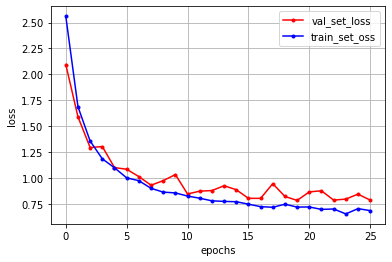

In [19]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label='val_set_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='train_set_oss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.show()

In [6]:
from PIL import Image
import os, glob, numpy as np
from keras.models import load_model

caltech_dir = "D:/ex"
categories  = os.listdir(caltech_dir)
nb_classes = len(categories )

image_w = 128
image_h = 128

X = []
filenames = []
files = glob.glob(caltech_dir+"/*.*")
for i, f in enumerate(files):
    img = Image.open(f)
    img = img.convert("RGB")
    img = img.resize((image_w, image_h))
    data = np.asarray(img)
    filenames.append(f)
    X.append(data)
    
X = np.array(X)
model = load_model('./food-8.model')

prediction = model.predict(X)
p=np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
cnt = 0

caltech_dir = "D:/food-8"
categories  = os.listdir(caltech_dir)
for i in prediction:
    pre_ans = i.argmax()  
    print(i)
    print(pre_ans)
    pre_ans_str = categories[pre_ans]
    print(i,"해당 "+"이미지는 "+pre_ans_str+"로 추정됩니다.")

[0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000]
1
[0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000] 해당 이미지는 계란찜로 추정됩니다.
[0.000 0.000 0.000 0.000 0.000 1.000 0.000 0.000]
5
[0.000 0.000 0.000 0.000 0.000 1.000 0.000 0.000] 해당 이미지는 애호박볶음로 추정됩니다.
[0.000 0.000 0.000 0.000 1.000 0.000 0.000 0.000]
4
[0.000 0.000 0.000 0.000 1.000 0.000 0.000 0.000] 해당 이미지는 삼계탕로 추정됩니다.
[0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000]
1
[0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000] 해당 이미지는 계란찜로 추정됩니다.
[0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000]
1
[0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000] 해당 이미지는 계란찜로 추정됩니다.
[0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000]
1
[0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000] 해당 이미지는 계란찜로 추정됩니다.
[0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000]
1
[0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000] 해당 이미지는 계란찜로 추정됩니다.
[0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000]
1
[0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000] 해당 이미지는 계란찜로 추정됩니다.
[0.000 1.000 0.000 0.0

array([[0.000, 1.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000],
       [0.000, 0.000, 0.000, 0.000, 0.000, 1.000, 0.000, 0.000],
       [0.000, 0.000, 0.000, 0.000, 1.000, 0.000, 0.000, 0.000],
       [0.000, 1.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000],
       [0.000, 1.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000],
       [0.000, 1.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000],
       [0.000, 1.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000],
       [0.000, 1.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000],
       [0.000, 1.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000],
       [0.000, 1.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000],
       [0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 1.000],
       [0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 1.000],
       [0.000, 0.000, 0.000, 0.000, 1.000, 0.000, 0.000, 0.000],
       [0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 1.000],
       [0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 1.000],
       [0.000, 0.000, 0.0